# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [41]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [42]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()

tips['res'] = reg.resid
reg.summary()

# R² log: 0.294
# R² polinomio: 0.301

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           5.02e-23
Time:                        22:10:41   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

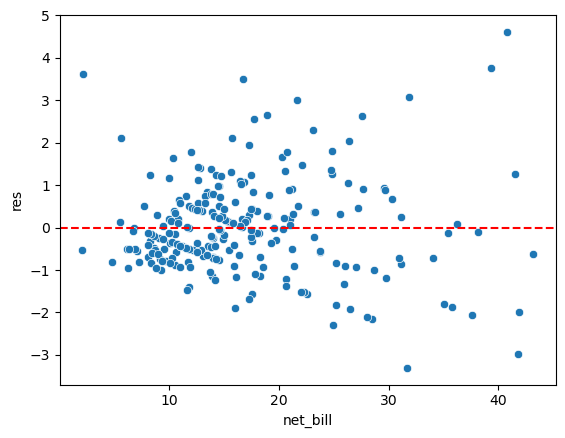

In [44]:
sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

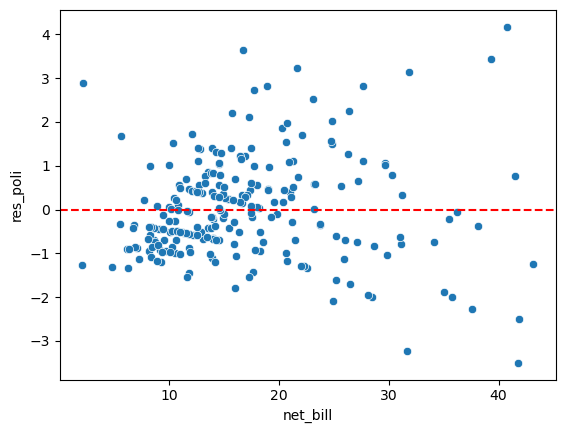

In [22]:
sns.scatterplot(x = 'net_bill', y = 'res_poli', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

Entre as duas alternativas a melhor foi a do polinômio de segundo grau, tanto pela distribuiçao do resíduo como pelo R². Mas se for analisar pelo o método sem nenhuma operaçao matemática o resultado foi melhor do que o de polinômio pelo o valor do R², porém a distribuiçao do resíduo se mostrou bem semelhante.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [32]:
tips1 = sns.load_dataset("tips")
tips1['tip_pct'] = tips1['tip'] / (tips1['total_bill'] - tips1['tip'])
tips1['net_bill'] = tips1['total_bill'] - tips1['tip']
tips1.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [38]:
reg = smf.ols('np.log(tip) ~ np.log(net_bill)', data = tips1).fit()

tips1['res_log'] = reg.resid
reg.summary()

# R² primeiro modeo: 0.311
# R² log netbill: 0.319
# R² poli netbill:  0.250

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           5.62e-22
Time:                        22:10:13   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O melhor modelo foi np.log(tip) ~ np.log(net_bill), conforme valores do R² obtidos.

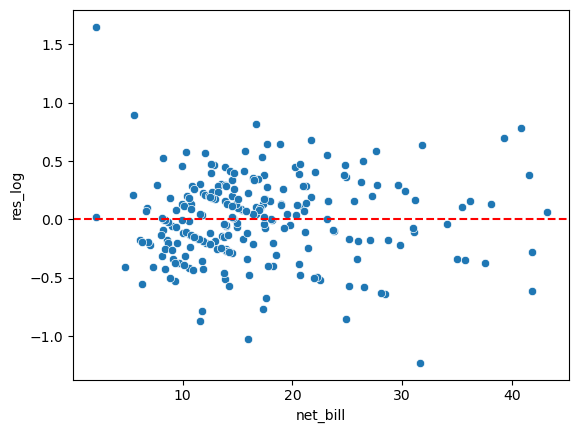

In [39]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips1)
plt.axhline(y=0, color='r', linestyle='--')

In [45]:
tips1['res'] = np.exp(tips1['res_log'])

In [47]:
tips1['res0'] = tips['res']

In [48]:
tips1

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,res_log,res,res0
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,-1.023409,0.359368,-1.908050
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,-0.212150,0.808844,-0.532915
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.172303,1.188038,0.429969
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.038553,1.039306,-0.044125
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.110113,1.116405,0.195281
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,0.554931,1.741821,2.293700
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,-0.574448,0.563015,-1.831920
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,-0.472779,0.623268,-1.383925
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,-0.476637,0.620868,-1.176990


comparativamente o melhor R² é o do modelo 1, por ser maior do que os demais.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [49]:
df = pd.read_csv('previsao_de_renda.csv')

In [89]:
reg = smf.ols('np.log(renda) ~ np.power(tempo_emprego,2)', data = df).fit()

df['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     1761.
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:26:55   Log-Likelihood:                -14106.
No. Observations:               12466   AIC:                         2.822e+04
Df Residuals:                   12464   BIC:                         2.823e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      8.0046      0.008   1050.676      0.000       7.990       8.019
np.power(tempo_emprego, 2)     0.0014   3.39e-05     41.959      0.000       0.001       0.001
==============================================================================
Omnibus:                        1.996   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                1.974
Skew:                           0.020   Prob(JB):                        0.373
Kurtosis:                       3.047   Cond. No.                         255.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

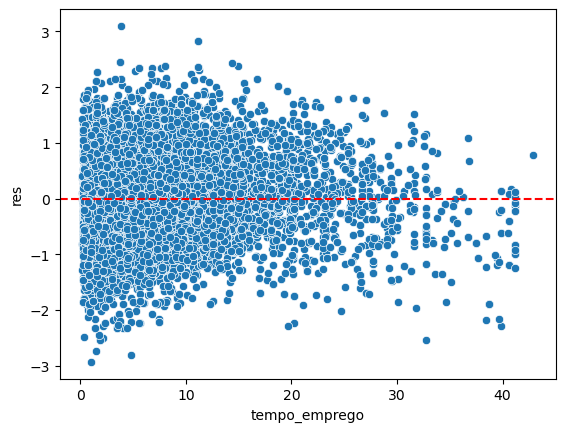

In [90]:
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

Em um primeiro momento a análise de resíduos nao está boa. Portanto foram testados novos modelos e se destacaram: 
np.log(renda) ~ np.power(tempo_emprego,2) 
np.log(renda) ~ np.log(tempo_emprego)

A distribuição dos resíduos em ambos foi bastante uniforme, porém com análise do R² foi identificado que o melhor modelo foi o log da renda e polinomio do tempo_emprego

In [91]:
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,res
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24,0.099722
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14,0.709797
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98,0.544026
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69,0.881664
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37,0.020400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29,-0.926042
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18,-0.380138
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85,-0.641694
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39,0.830151


In [103]:
reg = smf.ols('np.log(renda) ~ tempo_emprego + sexo + posse_de_imovel + tipo_renda + educacao + tipo_residencia + idade', data = df).fit()

df['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     232.8
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:38:14   Log-Likelihood:                -13209.
No. Observations:               12466   AIC:                         2.645e+04
Df Residuals:                   12448   BIC:                         2.659e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.2408      0.092     78.569      0.000       7.060       7.421
sexo[T.M]                            0.4862      0.013     36.430      0.000       0.460       0.512
posse_de_imovel[T.True]              0.0870      0.014      6.441      0.000       0.061       0.113
tipo_renda[T.Bolsista]              -0.0448      0.350     -0.128      0.898      -0.730       0.641
tipo_renda[T.Empresário]             0.1777      0.015     12.181      0.000       0.149       0.206
tipo_renda[T.Pensionista]            0.3805      0.233      1.632      0.103      -0.077       0.837
tipo_renda[T.Servidor público]       0.0968      0.021      4.574      0.000       0.055       0.138
educacao[T.Pós graduação]            0.5674      0.175      3.238      0.001       0.224       0.911
educacao[T.Secundário]               0.0234      0.071      0.329      0.742      -0.116       0.162
educacao[T.Superior completo]        0.1198      0.071      1.683      0.092      -0.020       0.259
educacao[T.Superior incompleto]     -0.0028      0.076     -0.036      0.971      -0.152       0.147
tipo_residencia[T.Casa]              0.0143      0.053      0.269      0.788      -0.090       0.119
tipo_residencia[T.Com os pais]      -0.0609      0.060     -1.020      0.308      -0.178       0.056
tipo_residencia[T.Comunitário]       0.0524      0.103      0.510      0.610      -0.149       0.254
tipo_residencia[T.Estúdio]          -0.1074      0.089     -1.211      0.226      -0.281       0.066
tipo_residencia[T.Governamental]    -0.0549      0.064     -0.852      0.394      -0.181       0.071
tempo_emprego                        0.0484      0.001     48.643      0.000       0.046       0.050
idade                                0.0045      0.001      6.195      0.000       0.003       0.006
==============================================================================
Omnibus:                        0.975   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                0.942
Skew:                          -0.012   Prob(JB):                        0.624
Kurtosis:                       3.035   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

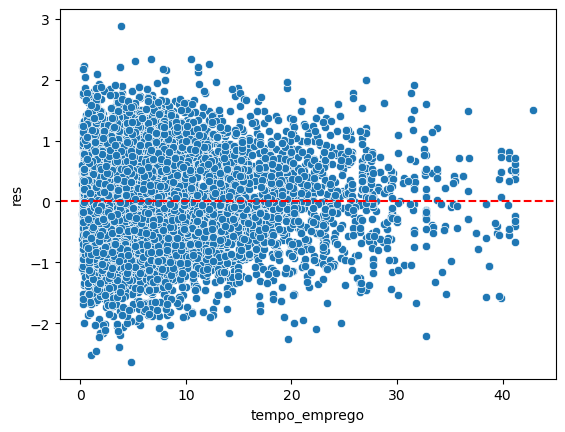

In [104]:
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')